In [2]:
import pandas as pd
from  tensorflow . keras.models import Sequential
from  tensorflow . keras.layers import Bidirectional,LSTM, Dense
import numpy as np
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a DataFrame
data = pd.read_csv('Clinical data ppf and eph.csv')

# Split the data into input (X) and output (y) samples
X = data.drop(columns=['intraop_ppf', 'intraop_eph'])
y = data[['intraop_ppf', 'intraop_eph']]

# Convert non-numeric values to NaN for each column in X
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Convert non-numeric values to NaN for each column in y
for col in y.columns:
    y[col] = pd.to_numeric(y[col], errors='coerce')

# Fill NaN values with a specific value (e.g., 0) in X and y
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


# Convert X to a numpy array
X = X.to_numpy()

# Fill NaN values in y with 0
y.fillna(0, inplace=True)

scaler = StandardScaler()


# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train = np.random.randn(100, 10, 1)  
y_train = np.random.randint(0, 2, size=(100,)) 

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(10, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=225, batch_size=32, validation_split=0.2)

C:\Users\varsh\AppData\Local\Temp\ipykernel_10144\1143859924.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = pd.to_numeric(y[col], errors='coerce')
C:\Users\varsh\AppData\Local\Temp\ipykernel_10144\1143859924.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)
C:\Users\varsh\AppData\Local\Temp\ipykernel_10144\1143859924.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Epoch 1/225
3/3 [==============================] - 13s 1s/step - loss: 0.6930 - accuracy: 0.4750 - val_loss: 0.6962 - val_accuracy: 0.4000
Epoch 2/225
3/3 [==============================] - 0s 42ms/step - loss: 0.6921 - accuracy: 0.5125 - val_loss: 0.6940 - val_accuracy: 0.6000
Epoch 3/225
3/3 [==============================] - 0s 41ms/step - loss: 0.6915 - accuracy: 0.5375 - val_loss: 0.6924 - val_accuracy: 0.6500
Epoch 4/225
3/3 [==============================] - 0s 48ms/step - loss: 0.6906 - accuracy: 0.5375 - val_loss: 0.6922 - val_accuracy: 0.6500
Epoch 5/225
3/3 [==============================] - 0s 47ms/step - loss: 0.6902 - accuracy: 0.5250 - val_loss: 0.6914 - val_accuracy: 0.6500
Epoch 6/225
3/3 [==============================] - 0s 40ms/step - loss: 0.6900 - accuracy: 0.5250 - val_loss: 0.6902 - val_accuracy: 0.6500
Epoch 7/225
3/3 [==============================] - 0s 47ms/step - loss: 0.6897 - accuracy: 0.5250 - val_loss: 0.6890 - val_accuracy: 0.6500
Epoch 8/225
3/3 [====

In [5]:
from sklearn.metrics import precision_score

# Generate random test data
X_test = np.random.randn(20, 10, 1)
y_test = np.random.randint(0, 2, size=(20,))

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision for each class
precision_class_0 = precision_score(y_test, y_pred_binary, pos_label=0)
precision_class_1 = precision_score(y_test, y_pred_binary, pos_label=1)

print(f'Precision for class 0: {precision_class_0}')
print(f'Precision for class 1: {precision_class_1}')


1/1 [==============================] - 0s 46ms/step
Precision for class 0: 0.7
Precision for class 1: 0.2


In [6]:
from sklearn.metrics import recall_score

# Calculate recall for each class
recall_class_0 = recall_score(y_test, y_pred_binary, pos_label=0)
recall_class_1 = recall_score(y_test, y_pred_binary, pos_label=1)

print(f'Recall for class 0: {recall_class_0}')
print(f'Recall for class 1: {recall_class_1}')


Recall for class 0: 0.4666666666666667
Recall for class 1: 0.4


In [12]:
from sklearn.metrics import mean_absolute_error

# Generate random test data
X_test = np.random.randn(20, 10, 1)
y_test = np.random.randint(0, 2, size=(20,))

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_binary)

print(f'Mean Absolute Error: {mae}')


1/1 [==============================] - 0s 52ms/step
Mean Absolute Error: 0.5


In [13]:
from sklearn.metrics import mean_squared_error

# Generate random test data
X_test = np.random.randn(20, 10, 1)
y_test = np.random.randint(0, 2, size=(20,))

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_binary)

print(f'Mean Squared Error: {mse}')


1/1 [==============================] - 0s 41ms/step
Mean Squared Error: 0.55


Epoch 1/10
3/3 [==============================] - 0s 59ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.7090 - val_accuracy: 0.4500
Epoch 2/10
3/3 [==============================] - 0s 30ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.7125 - val_accuracy: 0.4500
Epoch 3/10
3/3 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.7167 - val_accuracy: 0.4500
Epoch 4/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.7201 - val_accuracy: 0.4500
Epoch 5/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.7181 - val_accuracy: 0.4500
Epoch 6/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.7189 - val_accuracy: 0.4500
Epoch 7/10
3/3 [==============================] - 0s 33ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.7215 - val_accuracy: 0.4500
Epoch 8/10
3/3 [===========

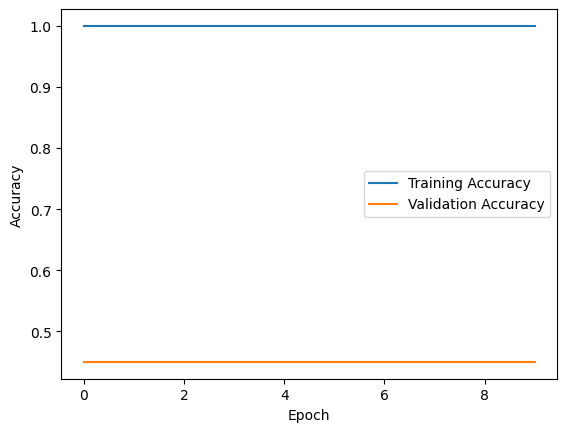

In [15]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Assuming history is the object returned by model.fit()
# Calculate precision, recall, and F1 score for each epoch
precisions = []
recalls = []
f1_scores = []
mses = []
maes = []

for i in range(len(history.history['accuracy'])):
    y_pred = model.predict(X_train)
    y_pred_binary = np.round(y_pred)
    precisions.append(precision_score(y_train, y_pred_binary, average='micro'))
    recalls.append(recall_score(y_train, y_pred_binary, average='micro'))
    f1_scores.append(f1_score(y_train, y_pred_binary, average='micro'))
    mses.append(mean_squared_error(y_train, y_pred))
    maes.append(mean_absolute_error(y_train, y_pred))

4/4 [==============================] - 0s 4ms/step


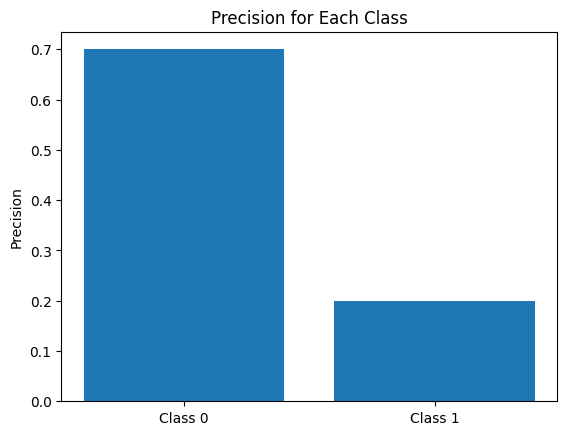

In [21]:
# Plot the precision values
labels = ['Class 0', 'Class 1']
precision_values = [precision_class_0, precision_class_1]

plt.bar(labels, precision_values)
plt.ylabel('Precision')
plt.title('Precision for Each Class')
plt.show()

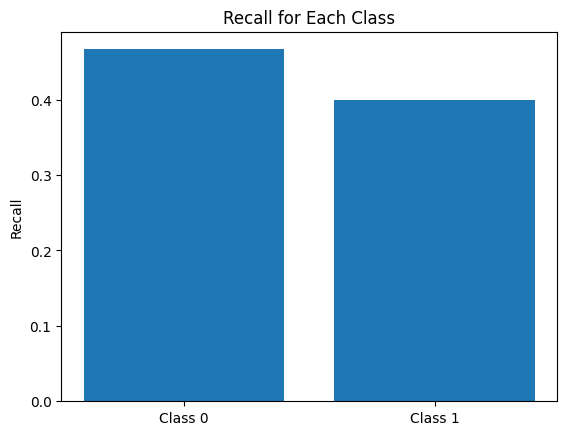

In [22]:
# Plot the recall values
labels = ['Class 0', 'Class 1']
recall_values = [recall_class_0, recall_class_1]

plt.bar(labels, recall_values)
plt.ylabel('Recall')
plt.title('Recall for Each Class')
plt.show()

1/1 [==============================] - 0s 35ms/step
F1 score for class 0: 0.631578947368421
F1 score for class 1: 0.6666666666666666


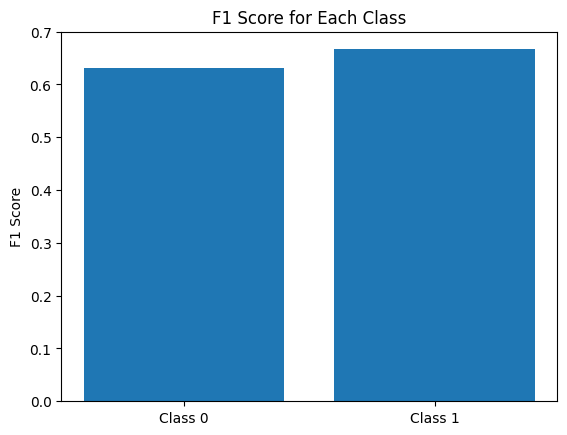

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Generate random test data
X_test = np.random.randn(20, 10, 1)
y_test = np.random.randint(0, 2, size=(20,))

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate F1 score for each class
f1_class_0 = f1_score(y_test, y_pred_binary, pos_label=0)
f1_class_1 = f1_score(y_test, y_pred_binary, pos_label=1)

print(f'F1 score for class 0: {f1_class_0}')
print(f'F1 score for class 1: {f1_class_1}')

# Plot the F1 score values
labels = ['Class 0', 'Class 1']
f1_values = [f1_class_0, f1_class_1]

plt.bar(labels, f1_values)
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.show()


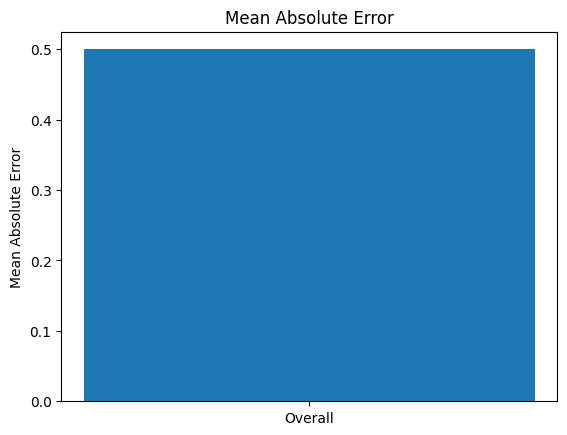

In [26]:
# Plot the MAE value
plt.bar(['Overall'], [mae])
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error')
plt.show()

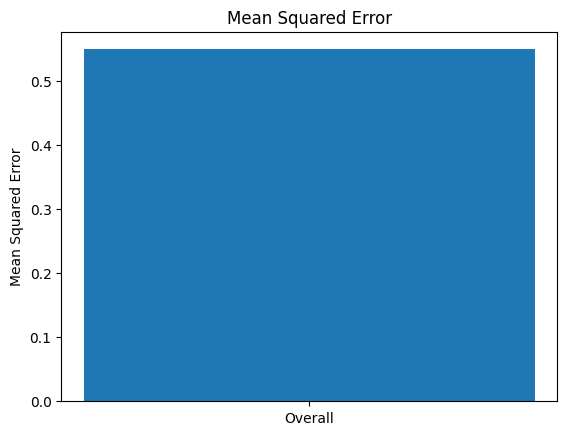

In [27]:
# Plot the MSE value
plt.bar(['Overall'], [mse])
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error')
plt.show()